In [2]:
from chart_analysis import df


                 date                     location  \
0 2025-04-20 18:43:37  Tsawwassen First Nation, BC   
1 2025-04-20 19:09:55  Tsawwassen First Nation, BC   
2 2025-04-20 22:12:02  Tsawwassen First Nation, BC   
3 2025-04-21 18:35:36  Tsawwassen First Nation, BC   
4 2025-04-21 23:54:43                    Nisku, AB   

                                     role             type_time  \
0  Fulfillment Centre Warehouse Associate  Seasonal | FULL_TIME   
1  Fulfillment Centre Warehouse Associate  Seasonal | FULL_TIME   
2  Fulfillment Centre Warehouse Associate  Seasonal | FULL_TIME   
3  Fulfillment Centre Warehouse Associate  Seasonal | FULL_TIME   
4    Delivery Station Warehouse Associate  Seasonal | FLEX_TIME   

   schedule_count                                               link  
0             1.0  https://hiring.amazon.ca/app#/jobDetail?jobId=...  
1             1.0  https://hiring.amazon.ca/app#/jobDetail?jobId=...  
2             1.0  https://hiring.amazon.ca/app#/jobDetail?

<Axes: >

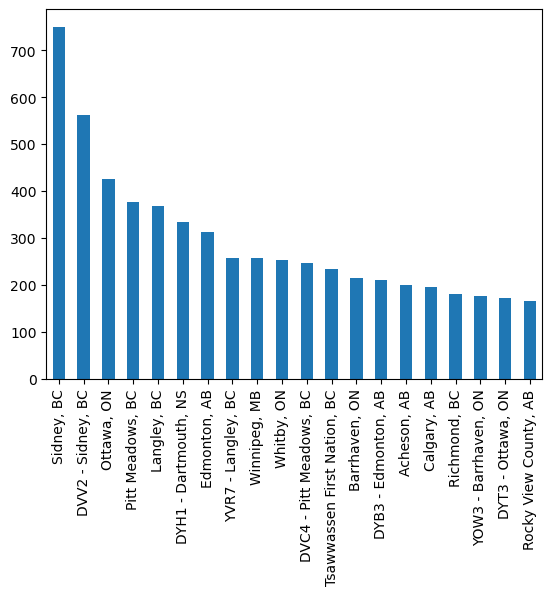

In [3]:
df["location"].value_counts().head(20).plot(kind="bar")


<Axes: xlabel='date'>

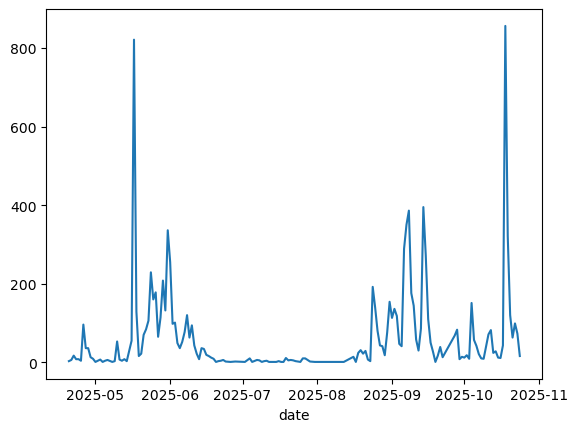

In [4]:
df.groupby(df["date"].dt.date).size().plot(kind="line")


<Axes: ylabel='type_time'>

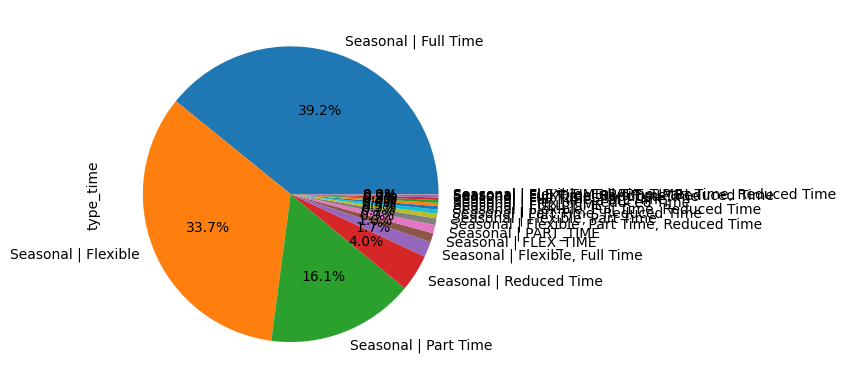

In [5]:
df["type_time"].value_counts().plot(kind="pie", autopct='%1.1f%%')


<Axes: >

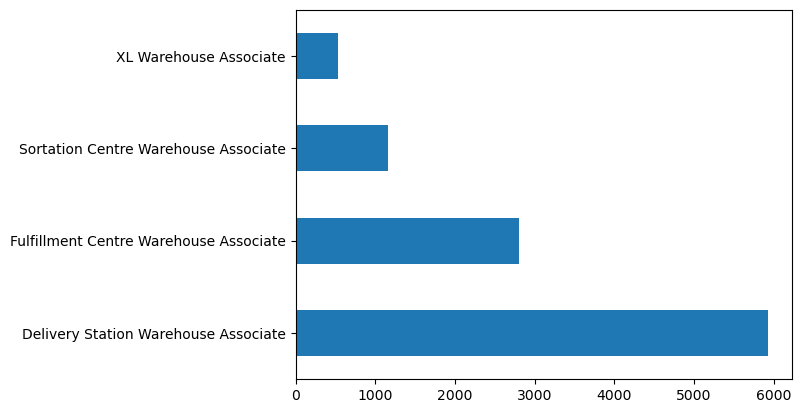

In [6]:
df["role"].value_counts().head(10).plot(kind="barh")


C:\Users\hp\AppData\Local\Temp\ipykernel_424\1704560748.py:26: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


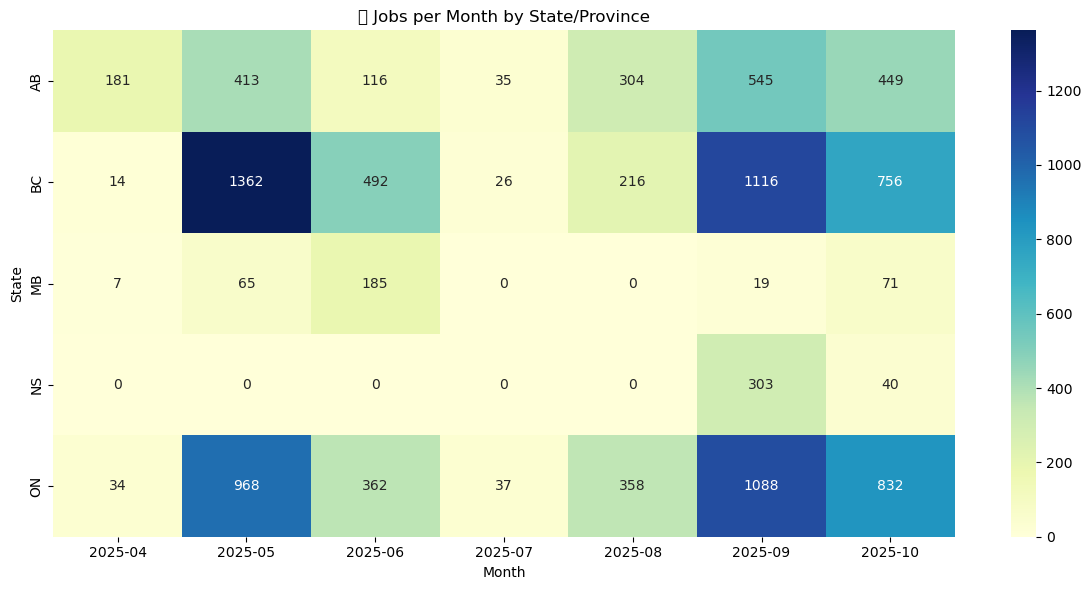

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("cleaned_jobs.csv")

# --- Data Cleaning ---
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M').astype(str)  # e.g., 2025-04

# Extract province/state from location
df['state'] = df['location'].str.extract(r',\s*([A-Z]{2})')  # last two capital letters (e.g., BC, ON)

# --- Group by month & state ---
monthly_jobs = df.groupby(['month', 'state']).size().reset_index(name='count')

# --- Pivot for heatmap ---
pivot = monthly_jobs.pivot(index='state', columns='month', values='count').fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("📅 Jobs per Month by State/Province")
plt.xlabel("Month")
plt.ylabel("State")
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_424\2707357246.py:8: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


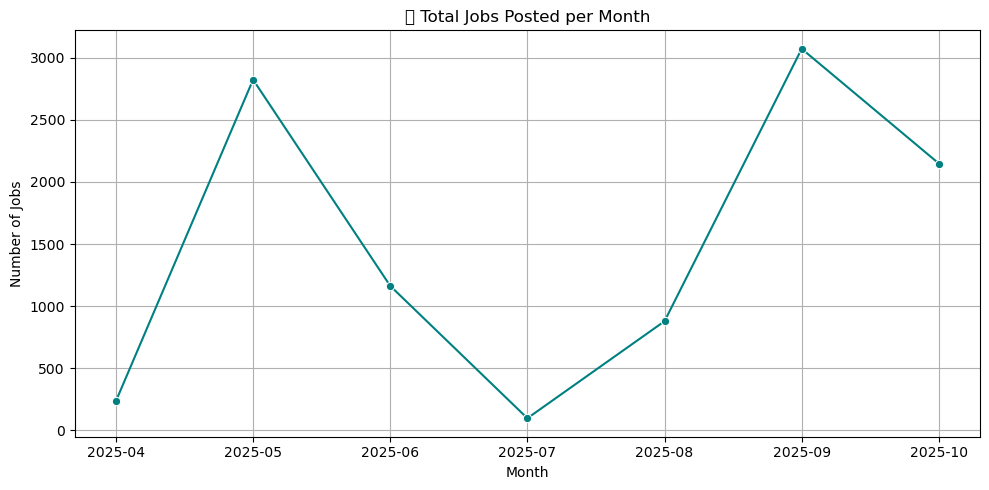

In [8]:
monthly_total = df.groupby('month').size().reset_index(name='count')
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_total, x='month', y='count', marker='o', color='teal')
plt.title("📆 Total Jobs Posted per Month")
plt.xlabel("Month")
plt.ylabel("Number of Jobs")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_424\341020637.py:27: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


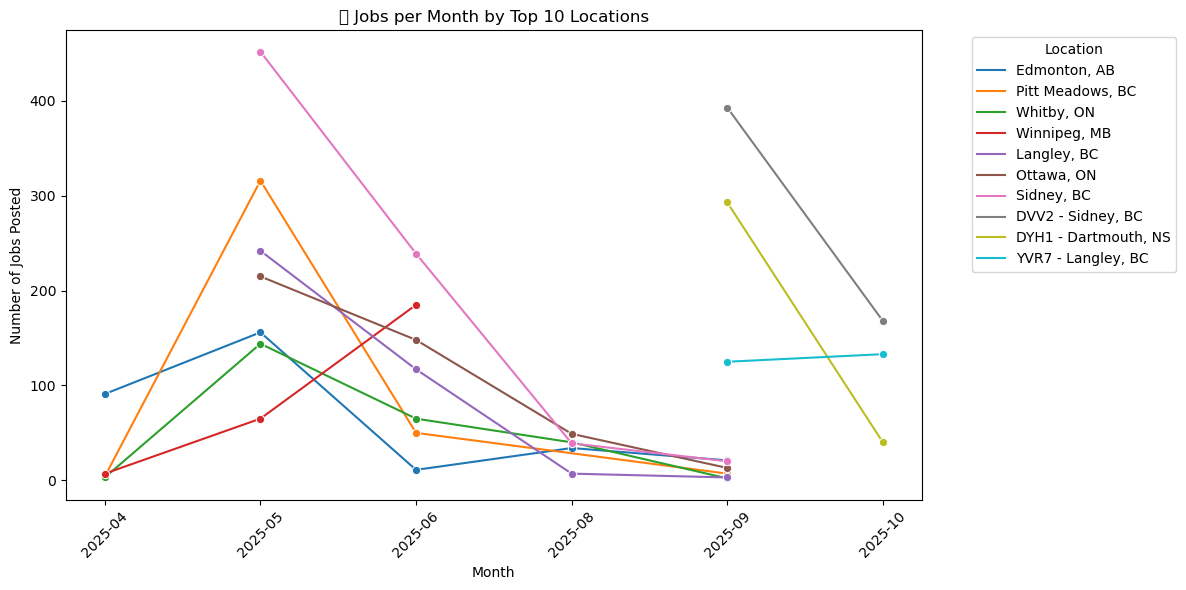

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("cleaned_jobs.csv")

# Convert date to datetime & extract month
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.to_period("M").astype(str)

# Group by month and location
monthly_location = df.groupby(["month", "location"]).size().reset_index(name="count")

# Get top N locations overall
top_locs = df["location"].value_counts().head(10).index
top_df = monthly_location[monthly_location["location"].isin(top_locs)]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_df, x="month", y="count", hue="location", marker="o")
plt.title("📆 Jobs per Month by Top 10 Locations")
plt.xlabel("Month")
plt.ylabel("Number of Jobs Posted")
plt.xticks(rotation=45)
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_424\334191328.py:17: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


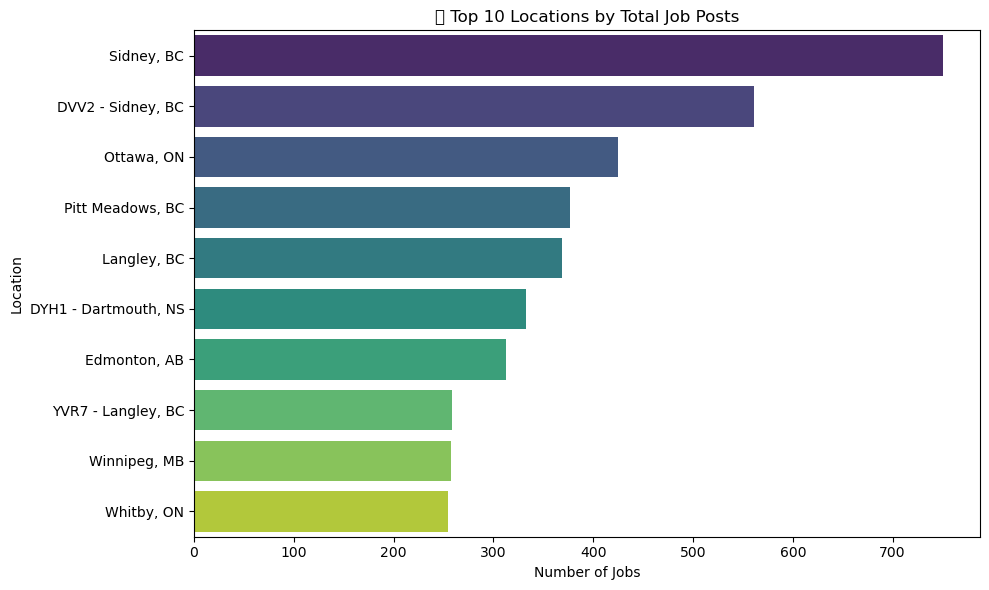

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("cleaned_jobs.csv")

# Count jobs per location
location_counts = df["location"].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.values, y=location_counts.index, palette="viridis")
plt.title("🏙 Top 10 Locations by Total Job Posts")
plt.xlabel("Number of Jobs")
plt.ylabel("Location")
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_424\3480315983.py:32: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


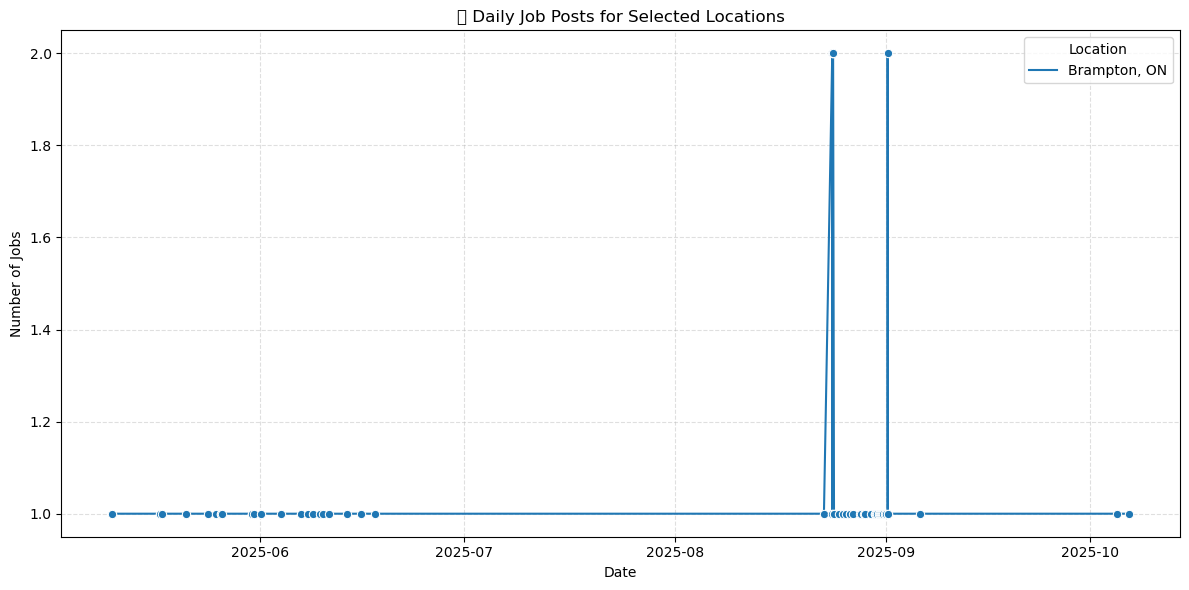

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned CSV
df = pd.read_csv("cleaned_jobs.csv")

# Convert date to datetime
df["date"] = pd.to_datetime(df["date"])

# Clean location text (optional but useful)
df["location"] = df["location"].str.strip()

# Choose the locations you want to track
locations_to_plot = ["Brampton, ON"]  # change as needed

# Filter only selected locations
filtered_df = df[df["location"].isin(locations_to_plot)]

# Group by date and location to count jobs per day
daily_counts = filtered_df.groupby(["date", "location"]).size().reset_index(name="job_count")

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_counts, x="date", y="job_count", hue="location", marker="o")

plt.title("📈 Daily Job Posts for Selected Locations")
plt.xlabel("Date")
plt.ylabel("Number of Jobs")
plt.legend(title="Location")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_424\1282483528.py:25: UserWarning: Glyph 129489 (\N{ADULT}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_424\1282483528.py:25: UserWarning: Glyph 127981 (\N{FACTORY}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_424\1282483528.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129489 (\N{ADULT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127981 (\N{FACTORY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


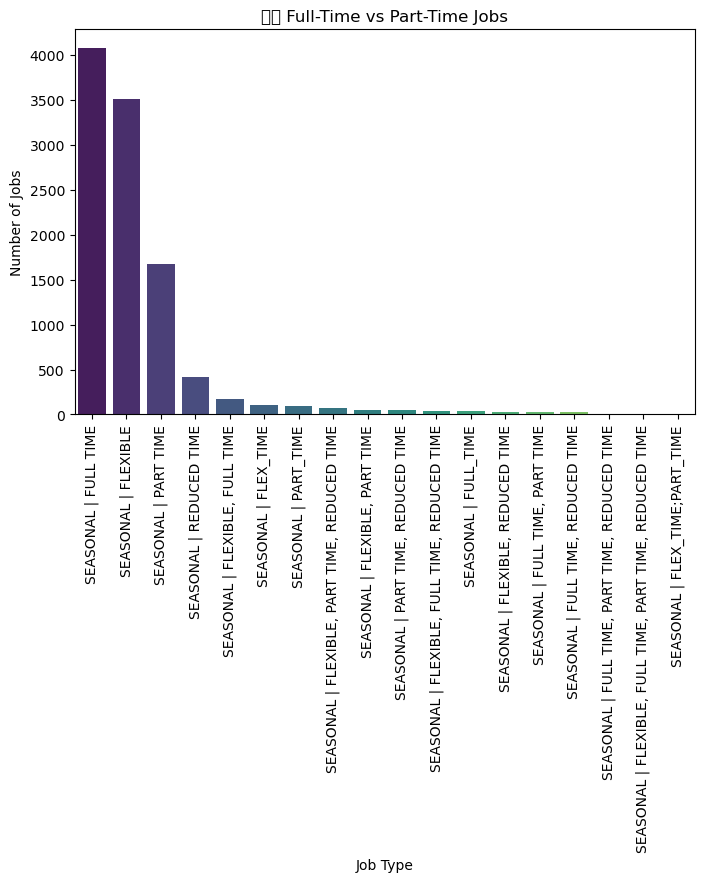

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_jobs.csv")

# Clean type_time column (optional if needed)
df["type_time"] = df["type_time"].str.upper().str.strip()

# Count jobs by type
job_type_counts = (
    df["type_time"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Job Type", "type_time": "Count"})
)

plt.figure(figsize=(8,5))
sns.barplot(data=job_type_counts, x="Job Type", y="Count", palette="viridis")

plt.title("🧑‍🏭 Full-Time vs Part-Time Jobs")
plt.xlabel("Job Type")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
